<a href="https://colab.research.google.com/github/dbengp/dio-ml-reconhecimento-facial/blob/main/sistema_de_reconhecimento_facial__com__TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aplicação de reconhecimento facial em Python usando o Google Colab e TensorFlow.

1. Configura-se o ambiente no Colab, instalando as bibliotecas necessárias:

In [20]:
!pip install tensorflow opencv-python matplotlib numpy scikit-learn

2. Importa-se as bibliotecas que serão utilizadas ao longo desse projeto:

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import files
import pickle

3. Segue-se com o carregamento e Pré-processamento das Imagens, codificando-se os rótulos:

In [22]:
dataset_path = '/content/data/dataset'

# Listas para armazenar imagens e rótulos
images = []
labels = []

# Iterar sobre as pastas de personagens
for label in os.listdir(dataset_path):
    person_folder = os.path.join(dataset_path, label)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter para RGB
            image = cv2.resize(image, (160, 160))  # Redimensionar para o tamanho esperado pelo modelo
            images.append(image)
            labels.append(label)

# Converter listas para arrays numpy
images = np.array(images)
labels = np.array(labels)

# Codificar os rótulos (nomes dos personagens) em números
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Converter rótulos codificados para one-hot encoding
labels_one_hot = to_categorical(labels_encoded)

4. Divide-se o Dataset em 'treino' e 'teste':

In [23]:
# Dividir o dataset (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

5. Segiue-se com a construção do Modelo de Reconhecimento Facial

In [24]:
# Construir o modelo
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Número de classes = número de personagens
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 158, 158, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 79, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 77, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 92416)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,829,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,849,542 (45.20 MB)

 Trainable params: 11,849,542 (45.20 MB)

 Non-trainable params: 0 (0.00 B)

6. Treina-se o Modelo com um dataset de imagens, aqui nesse exemplo são dos personagens da série "Friends": "Joe", "Rachael", "Chandler", "Phoebe", "Monica" e "Ross".

In [25]:
# Treinar o modelo
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 87.6182 - val_accuracy: 0.0000e+00 - val_loss: 1077.3934
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2917 - loss: 1034.2866 - val_accuracy: 0.1667 - val_loss: 973.2456
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1667 - loss: 1421.6676 - val_accuracy: 0.0000e+00 - val_loss: 988.7615
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1667 - loss: 952.1743 - val_accuracy: 0.0000e+00 - val_loss: 561.8751
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0833 - loss: 561.9706 - val_accuracy: 0.0000e+00 - val_loss: 264.6027
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4583 - loss: 239.6116 - val_accuracy: 0.0000e+00 - val_loss: 137.2618
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2917 - loss: 148.2079 - val_accuracy: 0.3333 - val_loss: 48.6936
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 55.8023 - val_ac

7. Salva-se o Modelo e LabelEncoder

In [26]:
# Salvar o modelo
model.save('friends_face_recognition_model.h5')

# Salvar o LabelEncoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

8. Testa-se do Modelo com uma Nova Imagem, Prevendo-se o personagem na nova imagem:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Personagem reconhecido: chandler


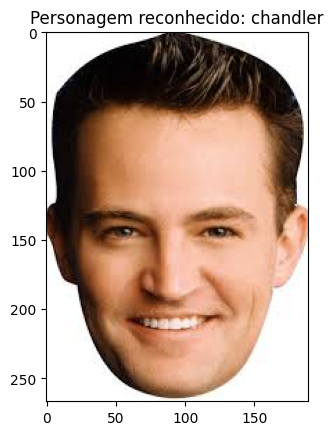

In [27]:
new_image_path='/content/data/whois.jpg'

# Função para prever o personagem em uma nova imagem
def predict_face(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (160, 160))
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

# Testar com a nova imagem
predicted_character = predict_face(new_image_path)
print(f"Personagem reconhecido: {predicted_character}")

# Exibir a imagem com o personagem reconhecido
image = cv2.imread(new_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(f"Personagem reconhecido: {predicted_character}")
plt.show()